# 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils # one-hot vector
from keras.datasets import cifar10 # CIFAR-10 dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten

# 데이터 불러오기 & 형태 확인

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("Train samples: ", train_images.shape, train_labels.shape)
print("Test samples: ", test_images.shape, test_labels.shape)

170508288/170498071 [==============================] - 3s 0us/step
Train samples:  (50000, 32, 32, 3) (50000, 1)
Test samples:  (10000, 32, 32, 3) (10000, 1)


# train_images 확인

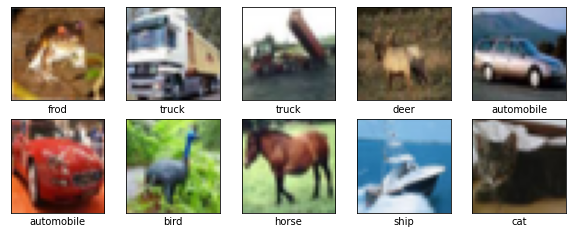

In [3]:
# 0~9에 해당하는 class name을 나타내기 위해 저장
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frod', 'horse', 'ship', 'truck']

# 이미지와 label(class_names)을 함께 나타내도록 코드 작성
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# train_labels 확인

In [4]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# 데이터의 입력 형태 변환

In [5]:
# 입력 레이어에 데이터를 넣기 위한 데이터 구조 변경
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# image 데이터의 정규화 (0-255 -> 0-1)

In [6]:
# 정규화는 학습 시간을 단축시키고, 더 나은 성능이 가능하도록 함
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# one-hot encoding

In [7]:
# 손실함수에서 cross-entropy 계산을 위해 label 값에 대해 one-hot encoding 적용
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)
print('train_labels: ', np.shape(train_labels))
print('test_labels: ', np.shape(test_labels))

train_labels:  (50000, 10)
test_labels:  (10000, 10)


In [8]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# CNN model 정의

In [9]:
model = Sequential(name='CIFAR10_CNN')

# 1st conv layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd conv layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# fc layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# model compile

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=False),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

# model 학습

In [11]:
# history는 epoch당 학습 결과를 저장
history = model.fit(train_images, train_labels,
                    epochs=35,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/35
313/313 [==============================] - 16s 16ms/step - loss: 1.6197 - accuracy: 0.4193 - val_loss: 1.3905 - val_accuracy: 0.5181
Epoch 2/35
313/313 [==============================] - 4s 13ms/step - loss: 1.2730 - accuracy: 0.5476 - val_loss: 1.1912 - val_accuracy: 0.5927
Epoch 3/35
313/313 [==============================] - 4s 13ms/step - loss: 1.1374 - accuracy: 0.5977 - val_loss: 1.1054 - val_accuracy: 0.6135
Epoch 4/35
313/313 [==============================] - 4s 13ms/step - loss: 1.0399 - accuracy: 0.6327 - val_loss: 0.9930 - val_accuracy: 0.6607
Epoch 5/35
313/313 [==============================] - 4s 14ms/step - loss: 0.9673 - accuracy: 0.6602 - val_loss: 0.9504 - val_accuracy: 0.6689
Epoch 6/35
313/313 [==============================] - 4s 13ms/step - loss: 0.9252 - accuracy: 0.6739 - val_loss: 0.9414 - val_accuracy: 0.6675
Epoch 7/35
313/313 [==============================] - 4s 13ms/step - loss: 0.8781 - accuracy: 0.6925 - val_loss: 0.8943 - val_accuracy: 0.692

# model 평가

In [12]:
loss, acc = model.evaluate(test_images, test_labels)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.8616 - accuracy: 0.7190
Test loss:  0.861636221408844
Test accuracy:  0.718999981880188


# epoch에 따른 loss 변화 그래프

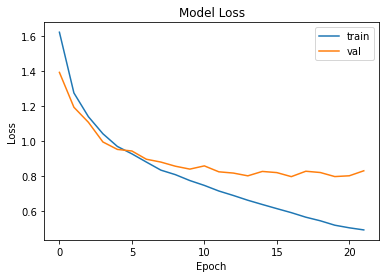

In [13]:
def plt_show_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc=0)

plt_show_loss(history)
plt.show()

# epoch에 따른 accuracy 변화 그래프

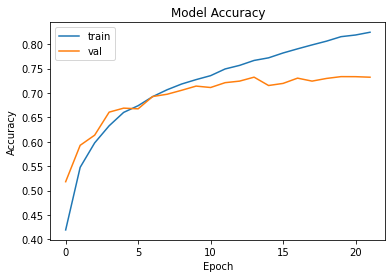

In [14]:
def plt_show_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['train', 'val'], loc=0)

plt_show_acc(history)
plt.show()

# prediction

In [15]:
# 훈련된 모델을 통해서 예측 & 시각화
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == np.argmax(true_label):
    color = "blue"
  else:
    color = "red"
  
  plt.xlabel("{}  {:0.2f}%  ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[np.argmax(true_label)]), color=color)

In [16]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('blue')

# 결과 확인

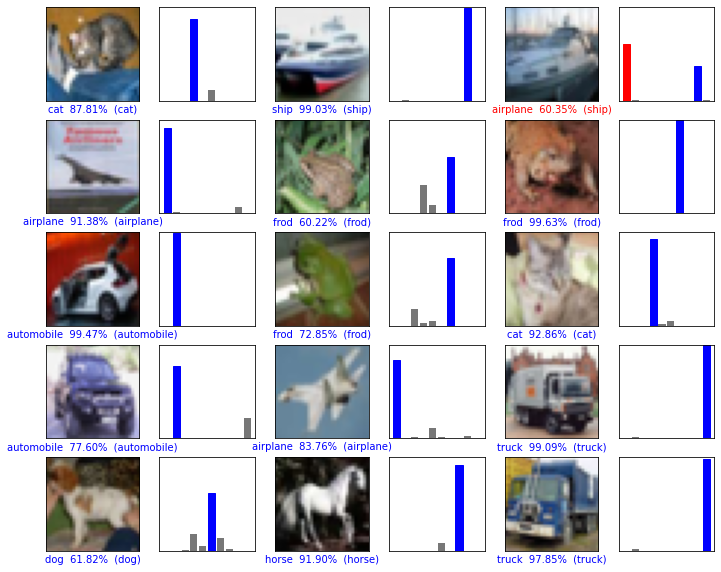

In [17]:
num_rows = 5
num_cols = 3

num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()